<a href="https://colab.research.google.com/github/mahidher/Linear-Regression/blob/master/Advanced_Admission_prediction(lasso).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Creating adjusted R2

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
def adjustedr2(X,y):
  N=len(X)
  p=len(X.columns)
  r2 = regression.score(X,y)
  adr2 = 1 - (((1-N)*(1-r2))/(n-p-1))
  return adr2

In [ ]:
data = pd.read_csv("Admission_Prediction.csv")

In [ ]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [ ]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [ ]:
data['GRE Score'].fillna(data['GRE Score'].mean(),inplace=True)
data['TOEFL Score'].fillna(data['TOEFL Score'].mean(),inplace=True)
data['University Rating'].fillna(data['TOEFL Score'].mode()[0],inplace=True)

In [ ]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    float64
 2   TOEFL Score        500 non-null    float64
 3   University Rating  500 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [ ]:
data.drop("Serial No.",axis=1,inplace=True)

In [ ]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [ ]:
X = data[[ 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research']]
y= data[['Chance of Admit']]

In [ ]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0


In [ ]:
y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


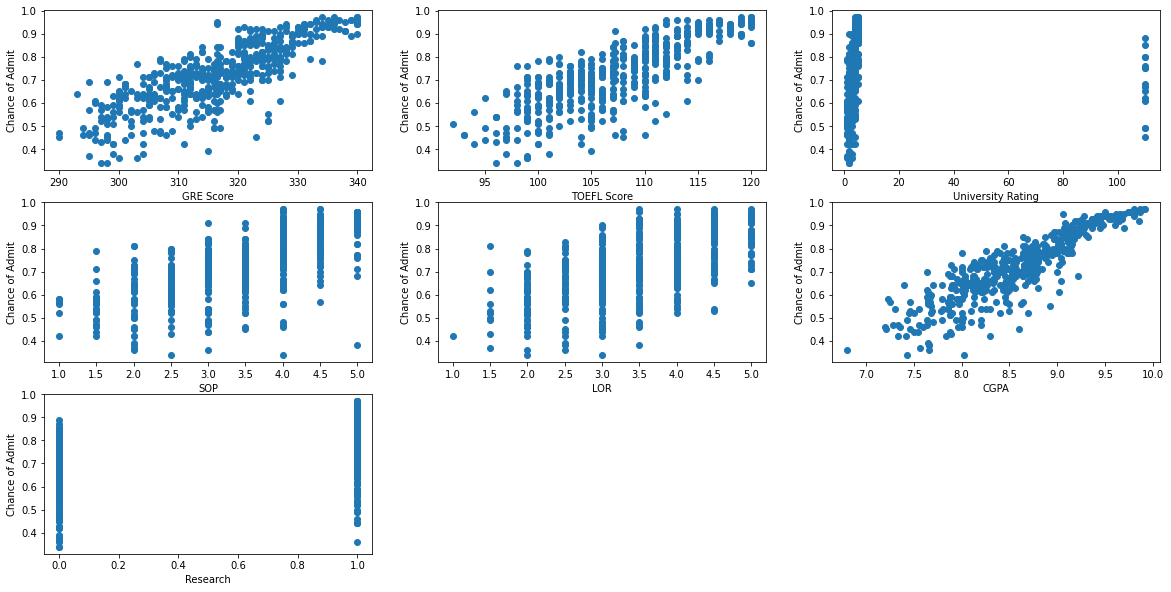

In [ ]:
i=1
plt.figure(figsize=(20,10))
for col in X.columns:
  plt.subplot(3,3,i)
  
  plt.xlabel(col)
  plt.ylabel("Chance of Admit")
  plt.scatter(X[col],y)
  i+=1


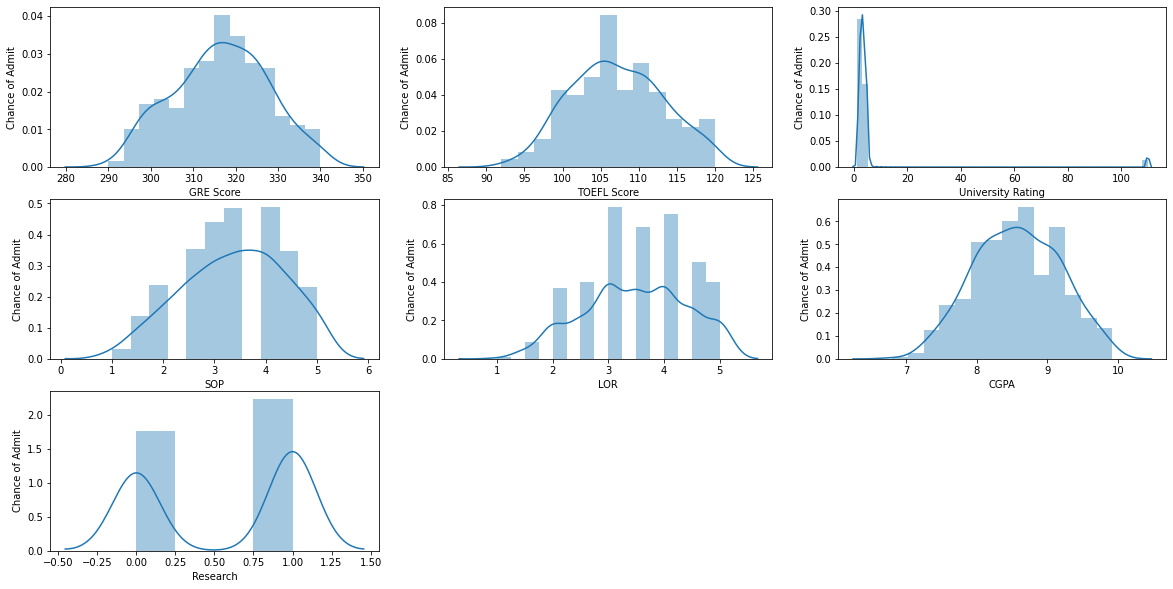

In [ ]:
i=1
plt.figure(figsize=(20,10))
for col in X.columns:
  plt.subplot(3,3,i)
  
  plt.xlabel(col)
  plt.ylabel("Chance of Admit")
  sns.distplot(X[col])
  i+=1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

In [ ]:
X_scaled

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.842741e+00,1.788542,-0.127443,1.137360,1.098944,1.776806,0.886405
1,6.708143e-01,-0.031058,-0.127443,0.632315,1.098944,0.485859,0.886405
2,5.124333e-15,-0.527313,-0.182187,-0.377773,0.017306,-0.954043,0.886405
3,4.905178e-01,0.465197,-0.182187,0.127271,-1.064332,0.154847,0.886405
4,-2.306679e-01,-0.692731,-0.236931,-1.387862,-0.523513,-0.606480,-1.128152
...,...,...,...,...,...,...,...
495,1.392000e+00,0.134360,-0.072700,1.137360,0.558125,0.734118,0.886405
496,1.842741e+00,1.623124,-0.072700,1.642404,1.639763,2.140919,0.886405
497,1.211704e+00,2.119379,-0.072700,1.137360,1.639763,1.627851,0.886405
498,-4.109644e-01,-0.692731,-0.127443,0.632315,1.639763,-0.242367,-1.128152


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
VIF = pd.DataFrame()
VIF["column"] = X.columns 
VIF["values"] = [variance_inflation_factor(X_scaled.values,i) for i in range(X.shape[1])]


In [ ]:
VIF.head()

,column,values
0,GRE Score,4.161800
1,TOEFL Score,3.754896
2,University Rating,1.005217
3,SOP,2.458131
4,LOR,1.989595


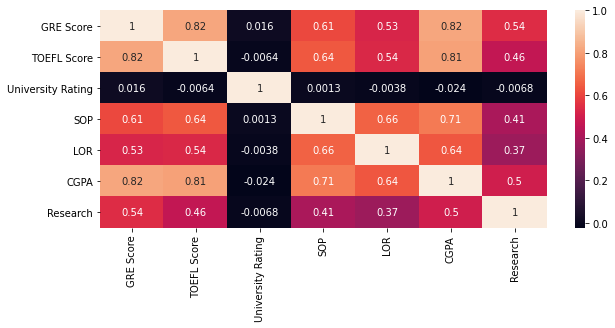

In [ ]:
plt.figure(figsize=(10,4))
sns.heatmap(X_scaled.corr(),annot=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=355)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression = LinearRegression()

In [ ]:
model = regression.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
regression.score(X_train,y_train)

0.8411305082595575

In [ ]:
regression.score(X_test,y_test)

0.7521920347418727

In [ ]:
def adjustedr2(X,y):
  N=len(X)
  p=len(X.columns)
  r2 = regression.score(X,y)
  adr2 = 1-(1-r2)*(N-1)/(N-p-1)
  
  print(adr2)

In [ ]:
adjustedr2(X_train,y_train)

0.8381002999702303


In [ ]:
adjustedr2(X_test,y_test)

0.7373659171623266


As we can see,our accuracy is less for test data,which means we have overfit the data

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
lasscv =LassoCV(alphas = None,cv=10)
lasscv.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [ ]:
lasscv.alpha_

0.0012970377471706767

In [ ]:
from sklearn.linear_model import Lasso


In [ ]:
lass = Lasso(alpha = lasscv.alpha_)

In [ ]:
lass.fit(X_train,y_train)


Lasso(alpha=0.0012970377471706767, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [170]:
lass.score(X_test,y_test)

0.7512500850496562

since the score is almost the same,the data is not overfit.U can use ridge and elastic net reg in the same way
